<a href="https://colab.research.google.com/github/milamihajlovska/VNP_Nike/blob/main/NIKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YESG

In [49]:
!pip install yesg

  Preparing metadata (setup.py) ... done
  Created wheel for yesg: filename=yesg-2.1.1-py3-none-any.whl size=6104 sha256=011c0ea617e686f43023124b48c317c9ef5416573346540e5e1fe0da8af2a80f
  Stored in directory: /root/.cache/pip/wheels/2b/53/0e/129a8d67d809bf89a196f3ea3e56b9df3da4975924157cb1a3
Successfully built yesg


In [50]:
import yesg

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.DataFrame()

Getting all available historic ESG ratings for NIKE.

In [ ]:
df=yesg.get_historic_esg('NKE')
df

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,73.00,69.00,75.00,75.00
2014-10-01,73.00,69.00,75.00,75.00
2014-11-01,73.00,69.00,75.00,75.00
2014-12-01,73.00,69.00,75.00,75.00
2015-01-01,73.00,69.00,75.00,75.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,16.80,2.71,6.99,7.10
2022-06-01,NaN,NaN,NaN,NaN


Because the rating methodology changed in November 2019 I am filtering the data after November 2019. Up until November 2019 a high score was given to a more sustainable companies. After November 2019 the rating changed to a risk rating.A high ESG score signales that a company has high ESG risk, meaning that a more sustainable company has a low ESG score.

Changing the dates as a separate column not as the index column. With this i filter out the esg scores after November 2019.

In [ ]:
dates = df.index
data = df.values

new_df = pd.DataFrame(data, index=dates, columns=df.columns)
new_df['Date'] = new_df.index
new_df = new_df.reset_index(drop=True)

In [ ]:
new_df

,Total-Score,E-Score,S-Score,G-Score,Date
0,73.00,69.00,75.00,75.00,2014-09-01
1,73.00,69.00,75.00,75.00,2014-10-01
2,73.00,69.00,75.00,75.00,2014-11-01
3,73.00,69.00,75.00,75.00,2014-12-01
4,73.00,69.00,75.00,75.00,2015-01-01
...,...,...,...,...,...
91,NaN,NaN,NaN,NaN,2022-04-01
92,16.80,2.71,6.99,7.10,2022-05-01
93,NaN,NaN,NaN,NaN,2022-06-01
94,NaN,NaN,NaN,NaN,2022-07-01


In [ ]:
start_date = pd.to_datetime('2019-12-01')
filtered_df = new_df[(new_df.Date >= start_date)]

In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/VNP proekt/nike_esg',index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/VNP proekt/nike_esg')
df.head()

,Total-Score,E-Score,S-Score,G-Score,Date
0,17.07,2.05,6.34,8.68,2019-12-01
1,17.07,2.05,6.34,8.68,2020-01-01
2,16.52,2.05,6.34,8.12,2020-02-01
3,16.52,2.05,6.34,8.12,2020-03-01
4,NaN,NaN,NaN,NaN,2020-04-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total-Score  15 non-null     float64
 1   E-Score      15 non-null     float64
 2   S-Score      15 non-null     float64
 3   G-Score      15 non-null     float64
 4   Date         33 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


Because the ESG score data is not as frequent and contains a lot of missing data and most importantly is time series data I am using an interpolation method to fill in the missing values.

Considering that ESG scores might change gradually over time and can have complex trends I chose time-based cubic interpolation.

Cubic interpolation is sensitive to the density and distribution of data points. When data points are sparse or irregular, it can introduce artificial fluctuations.

Due to the missing values and gaps in the ESG score dataset, cubic interpolation might lead to inaccurate results. That is why I am resampling to a higher frequency (daily) before using cubic interpolation so it can help mitigate this issue by providing a denser set of data points for interpolation. Later, I will merge this dataset with data for Nike's stock prices which has time series data of daily frequency.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
esg_score_resampled = df.resample('D').interpolate(method='time', limit_area='inside')
esg_score_cubic = esg_score_resampled.interpolate(method='cubic')


In [ ]:
esg_score_cubic.to_csv('/content/drive/MyDrive/VNP proekt/nike_esg_daily',index=False)

In [ ]:
esg_score_cubic

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2019-12-01,17.070000,2.050000,6.34,8.680000
2019-12-02,17.070000,2.050000,6.34,8.680000
2019-12-03,17.070000,2.050000,6.34,8.680000
2019-12-04,17.070000,2.050000,6.34,8.680000
2019-12-05,17.070000,2.050000,6.34,8.680000
...,...,...,...,...
2022-07-28,16.943478,3.025652,6.99,6.927826
2022-07-29,16.945109,3.029239,6.99,6.925870
2022-07-30,16.946739,3.032826,6.99,6.923913


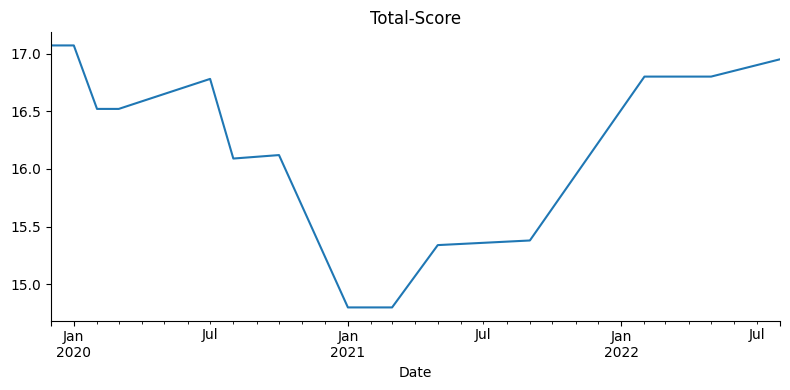

In [ ]:
plt.figure(figsize=(8, 4))
esg_score_cubic['Total-Score'].plot(kind='line', title='Total-Score')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


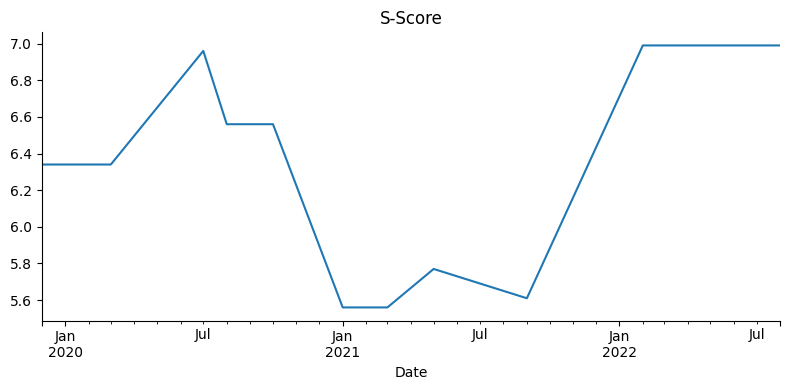

In [ ]:
plt.figure(figsize=(8, 4))
esg_score_cubic['S-Score'].plot(kind='line', title='S-Score')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


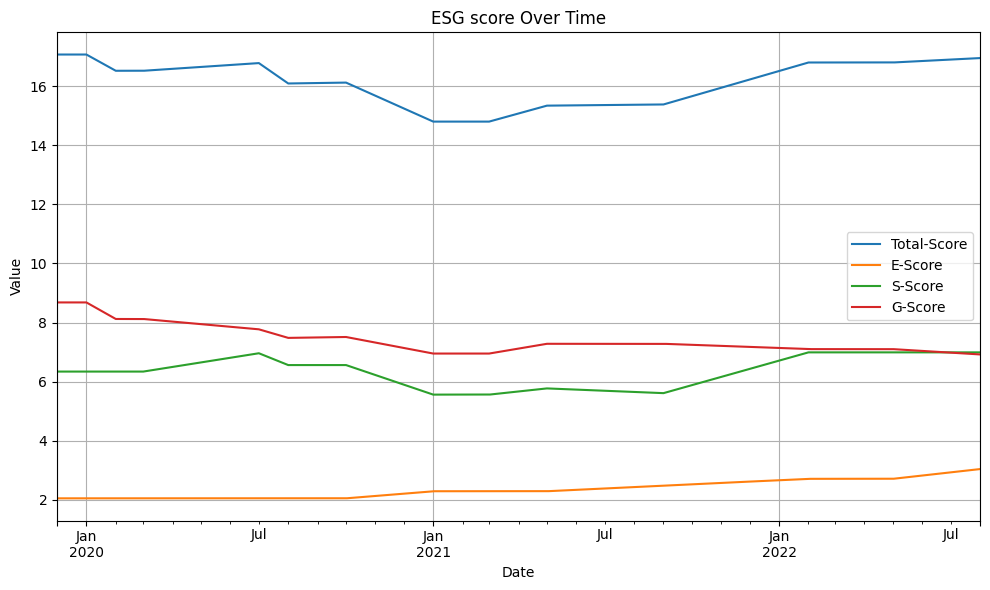

In [ ]:
plt.figure(figsize=(10, 6))

for column in esg_score_cubic.columns:
    esg_score_cubic[column].plot(kind='line', label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ESG score Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Financial Data NKE

In [ ]:
nike_daily=pd.read_csv('/content/drive/MyDrive/VNP proekt/NKE_daily.csv')

In [ ]:
nike_daily

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-02,94.089996,94.279999,92.980003,93.559998,90.450844,3892000
1,2019-12-03,92.480003,92.550003,91.309998,92.459999,89.387405,5570700
2,2019-12-04,92.809998,93.790001,92.730003,93.720001,90.605530,4456400
3,2019-12-05,95.879997,95.949997,94.680000,95.790001,92.606743,6946000
4,2019-12-06,96.559998,97.309998,96.379997,97.000000,93.776535,6368500
...,...,...,...,...,...,...,...
665,2022-07-25,109.610001,109.610001,107.680000,109.279999,107.969284,5079500
666,2022-07-26,107.480003,107.930000,104.570000,105.199997,103.938225,8459500
667,2022-07-27,106.300003,108.379997,105.750000,107.860001,106.566322,7437000
668,2022-07-28,109.430000,112.400002,108.029999,112.230003,110.883911,6773500


In [ ]:
nike_daily['Date'] = pd.to_datetime(nike_daily['Date'])
nike_daily.set_index('Date', inplace=True)

merged_df = nike_daily.merge(esg_score_cubic, how='left', left_index=True, right_index=True)

merged_df.reset_index(inplace=True)

In [ ]:
merged_df.to_csv('/content/drive/MyDrive/VNP proekt/nike_final',index=False)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/VNP proekt/nike_final')
df

,Date,Open,High,Low,Close,Adj Close,Volume,Total-Score,E-Score,S-Score,G-Score
0,2019-12-02,94.089996,94.279999,92.980003,93.559998,90.450844,3892000,17.070000,2.050000,6.34,8.680000
1,2019-12-03,92.480003,92.550003,91.309998,92.459999,89.387405,5570700,17.070000,2.050000,6.34,8.680000
2,2019-12-04,92.809998,93.790001,92.730003,93.720001,90.605530,4456400,17.070000,2.050000,6.34,8.680000
3,2019-12-05,95.879997,95.949997,94.680000,95.790001,92.606743,6946000,17.070000,2.050000,6.34,8.680000
4,2019-12-06,96.559998,97.309998,96.379997,97.000000,93.776535,6368500,17.070000,2.050000,6.34,8.680000
...,...,...,...,...,...,...,...,...,...,...,...
665,2022-07-25,109.610001,109.610001,107.680000,109.279999,107.969284,5079500,16.938587,3.014891,6.99,6.933696
666,2022-07-26,107.480003,107.930000,104.570000,105.199997,103.938225,8459500,16.940217,3.018478,6.99,6.931739
667,2022-07-27,106.300003,108.379997,105.750000,107.860001,106.566322,7437000,16.941848,3.022065,6.99,6.929783
668,2022-07-28,109.430000,112.400002,108.029999,112.230003,110.883911,6773500,16.943478,3.025652,6.99,6.927826


Using RandomForesetRegressor I want to see which features are most relevant for predicting the ESG score. Random Forest provides feature importance scores,  these scores represent how much each feature contributed to the model's predictions. Higher feature importance scores suggest that the corresponding features have a stronger impact on the predictions.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Total-Score','Date'],axis=1), df['Total-Score'], test_size=0.2, random_state=42)

rf_feature_importances = RandomForestRegressor().fit(X_train, y_train).feature_importances_


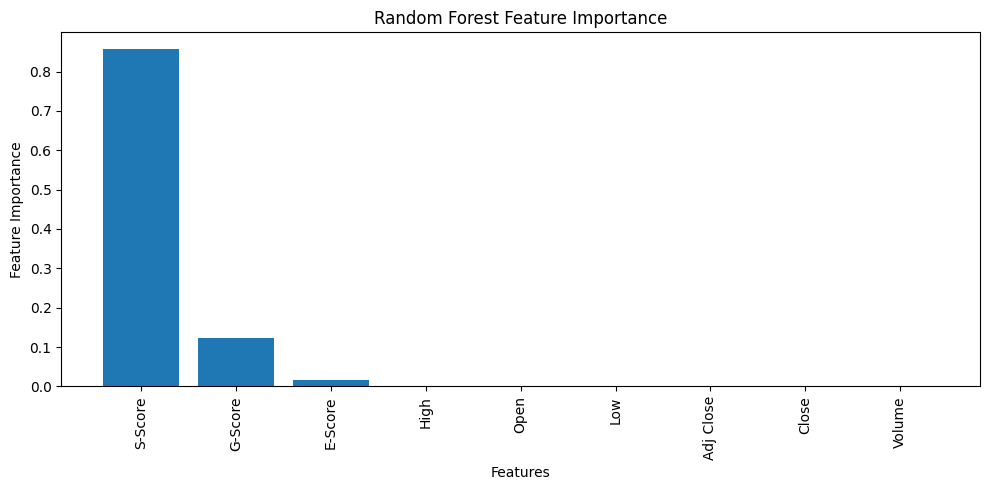

In [ ]:
# Sort indices based on importance scores
sorted_indices = rf_feature_importances.argsort()[::-1]
sorted_importances = rf_feature_importances[sorted_indices]
sorted_features = X_train.columns[sorted_indices]


plt.figure(figsize=(10, 5))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


We can see that S-Score has the highest feature importance score indicating that it is the most influential in predicting the 'Total-Score'.




# TsFresh

In [ ]:
!pip install tsfresh

Using the tsfresh library i will extract full features so the problem converts to a machine learning problem instead of a time series one. Later on I will apply ML models instead of applying time series models.

I use the column Date as id because I still want to work with a daily frequency considering that my dataset is smaller and I don't want to reduce it. I also impute all the missing data.

In [ ]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import select_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.feature_extraction.settings import from_columns

extracted_features = extract_features(df, column_id='Date', column_sort='Date')

impute(extracted_features)


In [ ]:
extracted_features.head()

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,G-Score__fourier_entropy__bins_5,G-Score__fourier_entropy__bins_10,G-Score__fourier_entropy__bins_100,G-Score__permutation_entropy__dimension_3__tau_1,G-Score__permutation_entropy__dimension_4__tau_1,G-Score__permutation_entropy__dimension_5__tau_1,G-Score__permutation_entropy__dimension_6__tau_1,G-Score__permutation_entropy__dimension_7__tau_1,G-Score__query_similarity_count__query_None__threshold_0.0,G-Score__mean_n_absolute_max__number_of_maxima_7
2019-12-02,0.0,0.0,0.0,0.0,94.089996,8852.927347,0.0,0.0,0.0,94.089996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-03,0.0,0.0,0.0,0.0,92.480003,8552.550955,0.0,0.0,0.0,92.480003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-04,0.0,0.0,0.0,0.0,92.809998,8613.695729,0.0,0.0,0.0,92.809998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-05,0.0,0.0,0.0,0.0,95.879997,9192.973825,0.0,0.0,0.0,95.879997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-06,0.0,0.0,0.0,0.0,96.559998,9323.833214,0.0,0.0,0.0,96.559998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that tsfresh extracted a lot of features (7830). We need to have only the features having the highest impact on the target which is Total-Score. I won't use all the features because they are way to many and for that purpose i will use the select_features() method from tsfresh. The method uses a threshold called "FDR level" which is the theoretical expected percentage of irrelevant features among all created features.

In [ ]:
extracted_features.index=range(1,671)

In [ ]:
target= df['Total-Score']
target.index = range(1,671)

In [ ]:
small_feat_set = select_features(extracted_features, target, fdr_level = 0.0005, ml_task = 'regression')

In [ ]:
target = target.values.reshape(670 ,1)

In [ ]:
small_feat_set.shape

(670, 228)

In [13]:
small_feat_set

,Total-Score__sum_values,"Total-Score__fft_coefficient__attr_""real""__coeff_0","Total-Score__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Total-Score__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Total-Score__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Total-Score__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)",Total-Score__quantile__q_0.9,Total-Score__quantile__q_0.8,Total-Score__quantile__q_0.7,"Total-Score__fft_coefficient__attr_""abs""__coeff_0",...,Volume__minimum,Volume__quantile__q_0.1,Volume__quantile__q_0.2,Volume__quantile__q_0.3,Volume__quantile__q_0.4,Volume__quantile__q_0.6,Volume__quantile__q_0.7,Volume__quantile__q_0.8,"Volume__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Volume__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)"
0,17.070000,17.070000,3.310552,4.681828,6.621104,10.468885,17.070000,17.070000,17.070000,17.070000,...,3892000.0,3892000.0,3892000.0,3892000.0,3892000.0,3892000.0,3892000.0,3892000.0,2.386930e+06,1.067468e+06
1,17.070000,17.070000,3.310552,4.681828,6.621104,10.468885,17.070000,17.070000,17.070000,17.070000,...,5570700.0,5570700.0,5570700.0,5570700.0,5570700.0,5570700.0,5570700.0,5570700.0,3.416463e+06,1.527889e+06
2,17.070000,17.070000,3.310552,4.681828,6.621104,10.468885,17.070000,17.070000,17.070000,17.070000,...,4456400.0,4456400.0,4456400.0,4456400.0,4456400.0,4456400.0,4456400.0,4456400.0,2.733072e+06,1.222267e+06
3,17.070000,17.070000,3.310552,4.681828,6.621104,10.468885,17.070000,17.070000,17.070000,17.070000,...,6946000.0,6946000.0,6946000.0,6946000.0,6946000.0,6946000.0,6946000.0,6946000.0,4.259922e+06,1.905095e+06
4,17.070000,17.070000,3.310552,4.681828,6.621104,10.468885,17.070000,17.070000,17.070000,17.070000,...,6368500.0,6368500.0,6368500.0,6368500.0,6368500.0,6368500.0,6368500.0,6368500.0,3.905747e+06,1.746703e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,16.938587,16.938587,3.285066,4.645785,6.570132,10.388290,16.938587,16.938587,16.938587,16.938587,...,5079500.0,5079500.0,5079500.0,5079500.0,5079500.0,5079500.0,5079500.0,5079500.0,3.115214e+06,1.393166e+06
666,16.940217,16.940217,3.285382,4.646232,6.570764,10.389290,16.940217,16.940217,16.940217,16.940217,...,8459500.0,8459500.0,8459500.0,8459500.0,8459500.0,8459500.0,8459500.0,8459500.0,5.188139e+06,2.320206e+06
667,16.941848,16.941848,3.285698,4.646679,6.571397,10.390290,16.941848,16.941848,16.941848,16.941848,...,7437000.0,7437000.0,7437000.0,7437000.0,7437000.0,7437000.0,7437000.0,7437000.0,4.561048e+06,2.039763e+06
668,16.943478,16.943478,3.286014,4.647126,6.572029,10.391290,16.943478,16.943478,16.943478,16.943478,...,6773500.0,6773500.0,6773500.0,6773500.0,6773500.0,6773500.0,6773500.0,6773500.0,4.154130e+06,1.857783e+06


Now I only have 228 features. However some are very big indicators for our target, we can see this later on. To see which features to include or exclude I will use eli5 and Random Forest.

In [ ]:
small_feat_set.to_csv('/content/drive/MyDrive/VNP proekt/small_feat_set',index=False)

In [4]:
small_feat_set= pd.read_csv('/content/drive/MyDrive/VNP proekt/small_feat_set')

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestRegressor as rf

perm = PermutationImportance(rf(n_estimators=100, random_state=42).fit(small_feat_set,target),random_state=42).fit(small_feat_set,target)
eli5.show_weights(perm, feature_names = small_feat_set.columns.tolist())

<ipython-input-20-d250a156b36d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  perm = PermutationImportance(rf(n_estimators=100, random_state=42).fit(small_feat_set,target),random_state=42).fit(small_feat_set,target)


Weight,Feature
0.0096 ± 0.0007,"Total-Score__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)"
0.0079 ± 0.0007,Total-Score__quantile__q_0.2
0.0076 ± 0.0006,Total-Score__maximum
0.0058 ± 0.0001,Total-Score__sum_values
0.0049 ± 0.0005,Total-Score__quantile__q_0.4
0.0048 ± 0.0005,"Total-Score__fft_coefficient__attr_""real""__coeff_0"
0.0042 ± 0.0004,Total-Score__quantile__q_0.3
0.0039 ± 0.0003,Total-Score__quantile__q_0.6
0.0031 ± 0.0001,Total-Score__mean
0.0030 ± 0.0002,Total-Score__median


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(small_feat_set, df['Total-Score'], test_size=0.2, random_state=42)

rf_feature_importances = RandomForestRegressor().fit(X_train, y_train).feature_importances_

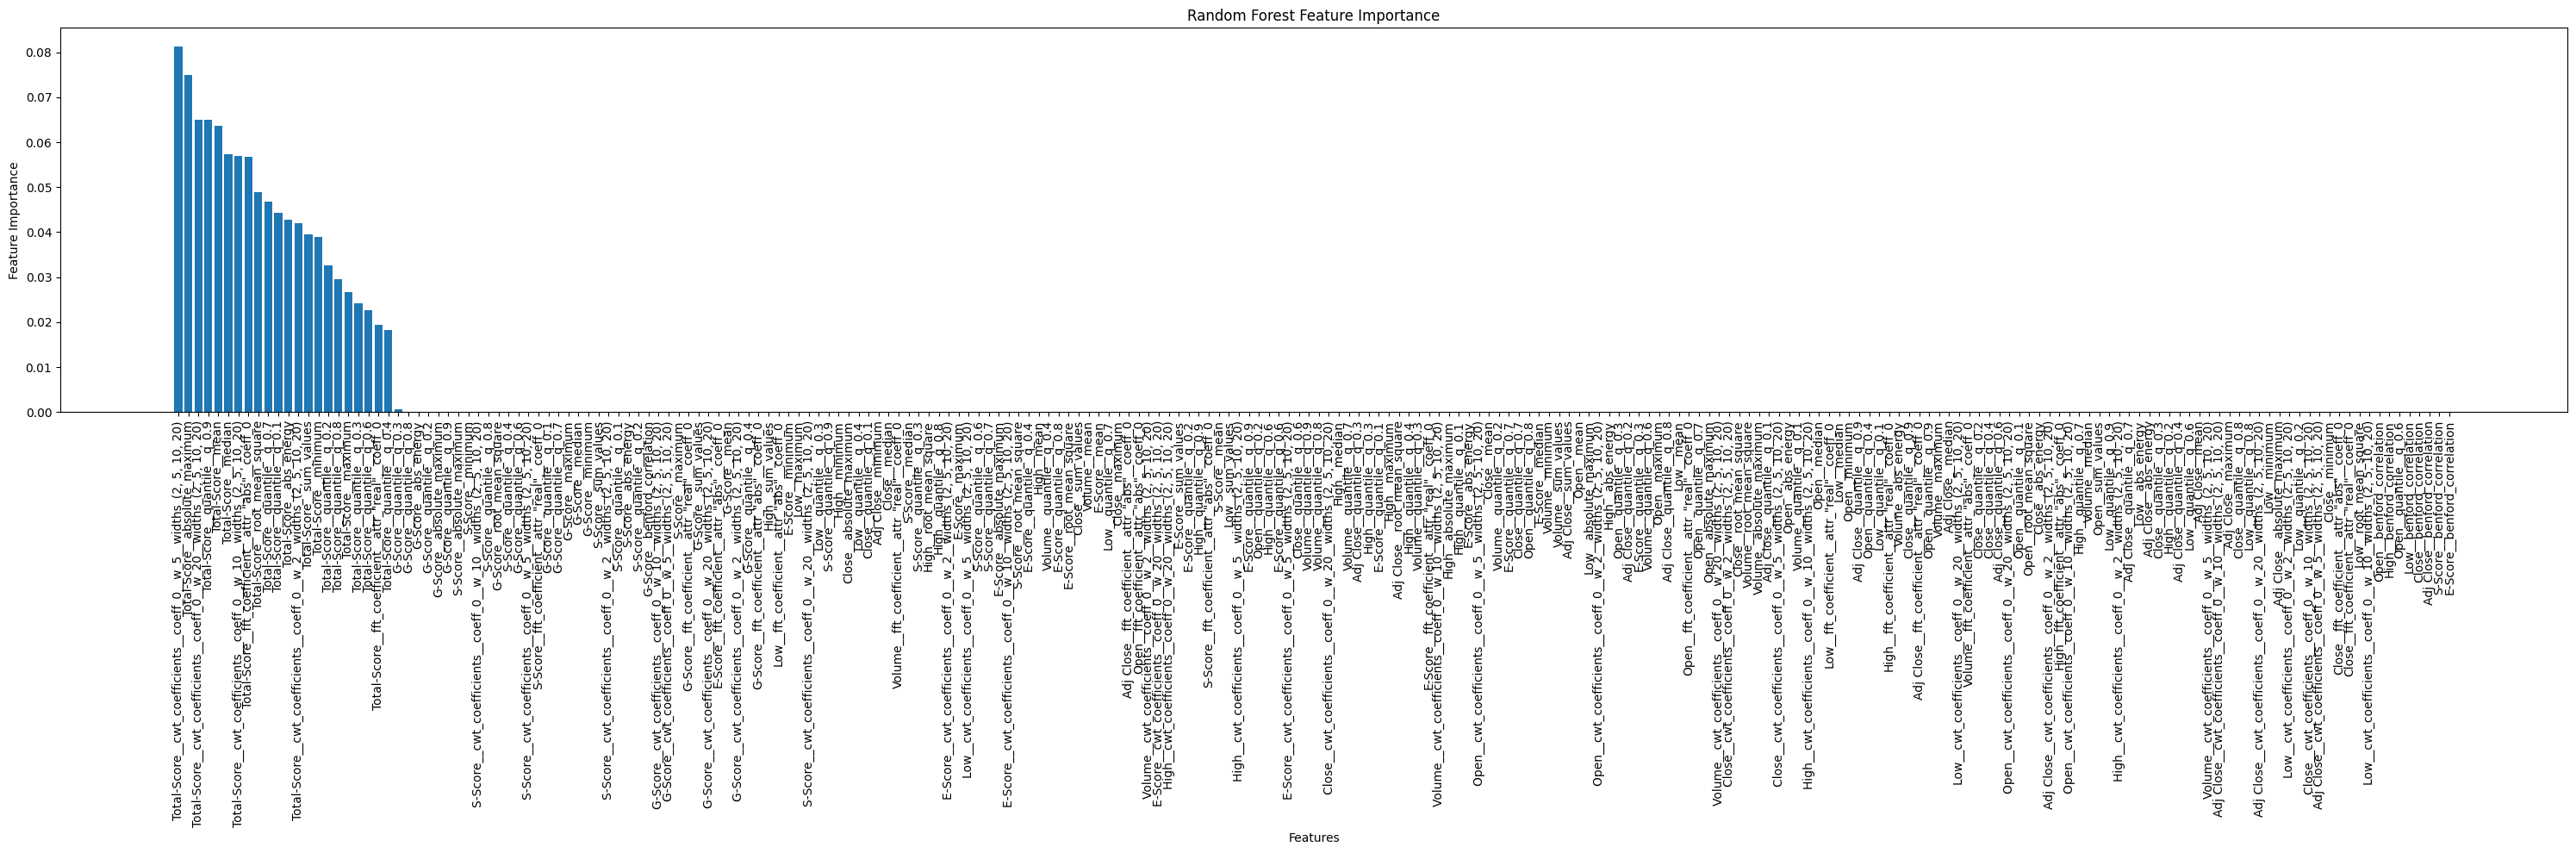

In [ ]:
sorted_indices = rf_feature_importances.argsort()[::-1]
sorted_importances = rf_feature_importances[sorted_indices]
sorted_features = X_train.columns[sorted_indices]

plt.figure(figsize=(30, 10))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


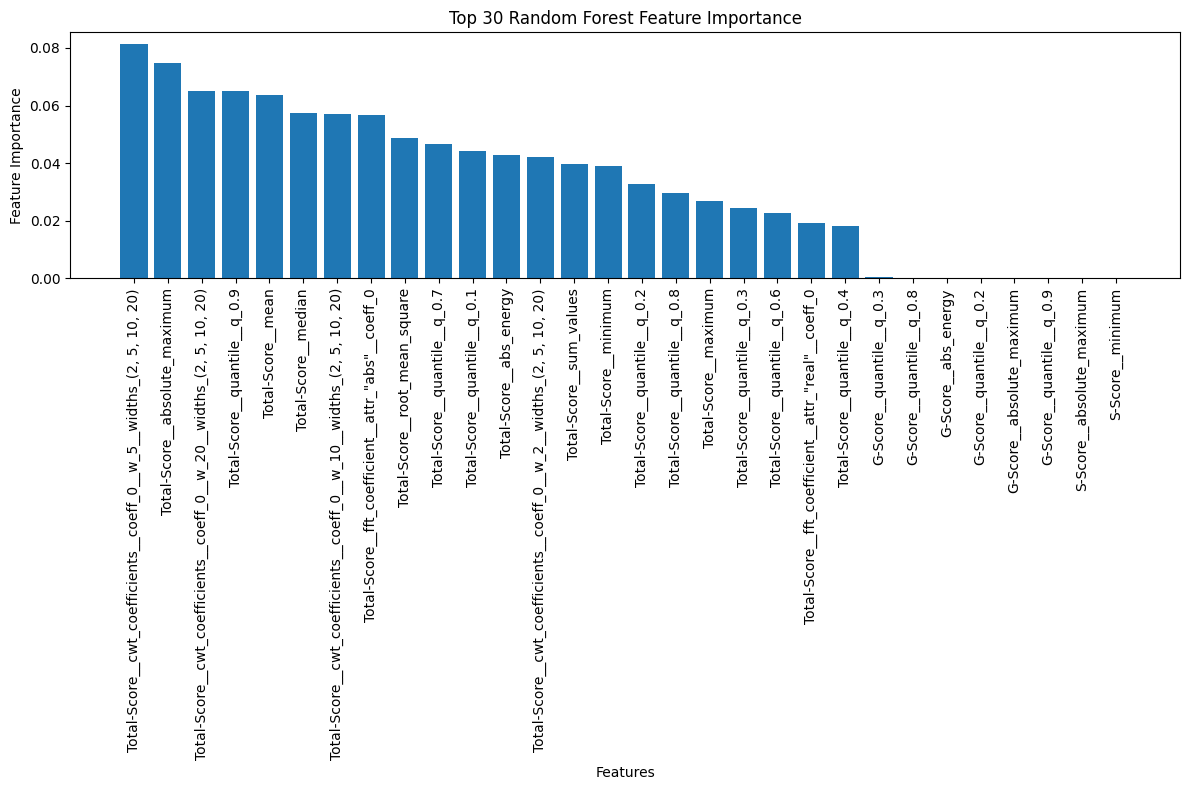

In [ ]:
top_features = sorted_features[:30]
top_importances = sorted_importances[:30]

plt.figure(figsize=(12, 8))
plt.bar(range(len(top_importances)), top_importances, tick_label=top_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 30 Random Forest Feature Importance')
plt.tight_layout()
plt.show()


Using both eli5 and Random Forest we can see that like expected the total score features are most relevant to the target. Including features that are directly derived from the target can lead to data leakage and overfitting, as the model might essentially "cheat" by using those features to predict the target.That is why I am going to drop them.

In [7]:
small_feat_set.drop(columns=['Total-Score__quantile__q_0.9', 'Total-Score__quantile__q_0.6',
       'Total-Score__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'Total-Score__quantile__q_0.8',
       'Total-Score__fft_coefficient__attr_"real"__coeff_0',
       'Total-Score__abs_energy', 'Total-Score__absolute_maximum',
       'Total-Score__minimum',
       'Total-Score__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'Total-Score__median', 'Total-Score__quantile__q_0.3',
       'Total-Score__quantile__q_0.4', 'Total-Score__maximum',
       'Total-Score__fft_coefficient__attr_"abs"__coeff_0',
       'Total-Score__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'Total-Score__mean', 'Total-Score__sum_values',
       'Total-Score__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'Total-Score__quantile__q_0.7', 'Total-Score__root_mean_square',
       'Total-Score__quantile__q_0.1', 'Total-Score__quantile__q_0.2'],inplace=True)

Benchmark for models

In [45]:
X_train, X_test, y_train, y_test = train_test_split(small_feat_set, df['Total-Score'], test_size=0.2, random_state=42)

rf_feature_importances = RandomForestRegressor().fit(X_train, y_train).feature_importances_

model_names = []
mse_values = []
mae_values = []
r2_values = []

models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42)
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    model_name = model.__class__.__name__
    model_names.append(model_name)
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    print(f"{model.__class__.__name__} -> MSE: {mse} MAE:{mae} R2: {r2}")


LinearRegression -> MSE: 2.7284506914800688e-05 MAE:0.003684269733102173 R2: 0.9999472009800453
RandomForestRegressor -> MSE: 0.00046339071314469894 MAE:0.011311953327187903 R2: 0.9991032795429812
GradientBoostingRegressor -> MSE: 0.00047544721434919344 MAE:0.013201678400080932 R2: 0.9990799486669764


With these results we can see that the models I tried give extreamly good results which sometimes it is not what we what it can mean the problem of overfitting.

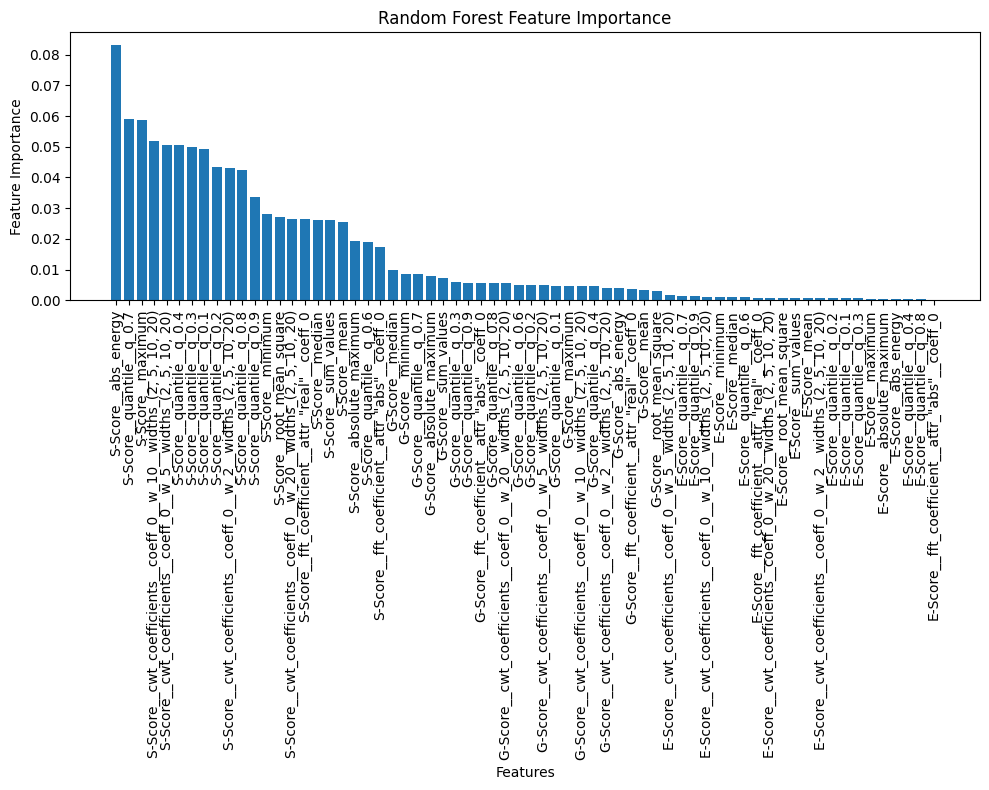

In [44]:
sorted_indices = rf_feature_importances.argsort()[::-1]
sorted_importances = rf_feature_importances[sorted_indices]
sorted_features = X_train.columns[sorted_indices]

top_features = sorted_features[:66]
top_importances = sorted_importances[:66]

plt.figure(figsize=(10, 8))
plt.bar(range(len(top_importances)), top_importances, tick_label=top_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [36]:
X = small_feat_set.values
y = df['Total-Score'].values

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

cross_val_results = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf_model.fit(X_train, y_train)

    predictions = rf_model.predict(X_test)

    mse = np.mean((y_test - predictions)**2)
    cross_val_results.append(mse)

    training_predictions = rf_model.predict(X_train)

    training_mse = np.mean((y_train - training_predictions)**2)
    training_mse_results.append(training_mse)

average_training_mse = np.mean(training_mse_results)
average_mse = np.mean(cross_val_results)

print(f"Average Mean Squared Error: {average_mse}")
print(f"Average Training Mean Squared Error: {average_training_mse}")


Average Mean Squared Error: 0.00032629714555533956
Average Training Mean Squared Error: 4.736895823754765e-05


I got a low training MSE which indicates that the model is fitting the training data well. This result suggests that the model can capture the underlying patterns in the training data and make accurate predictions. I also got a low testing MSE which indicates that the model is performing well on unseen data. This result suggests that the model is capable of generalizing its predictions to new data. These results for testing and training MSE can mean that the model is not heavily overfitting.

Lasso

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso(alpha=0.01, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print(f"Lasso Regression -> MSE: {lasso_mse} MAE: {lasso_mae} R2:{lasso_r2}")


model_names.append('Lasso')
mse_values.append(lasso_mse)
mae_values.append(lasso_mae)
r2_values.append(lasso_r2)


Lasso Regression -> MSE: 0.0007259399726379874 MAE: 0.023717267187989857 R2:0.9985952130554915


In [47]:
results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'MAE': mae_values,
    'R2': r2_values
})
results_df

,Model,MSE,MAE,R2
0,LinearRegression,0.000027,0.003684,0.999947
1,RandomForestRegressor,0.000463,0.011312,0.999103
2,GradientBoostingRegressor,0.000475,0.013202,0.999080
3,Lasso,0.000726,0.023717,0.998595


PCA

In [38]:
from sklearn.decomposition import PCA

num_components = 50
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(small_feat_set)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Total-Score'], test_size=0.2, random_state=42)

rf_feature_importances = RandomForestRegressor().fit(X_train, y_train).feature_importances_

models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42),

]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    print(f"{model.__class__.__name__} - MSE: {mse}- MAE:{mae} - R2: {r2}")


LinearRegression - MSE: 1.1796165874253915e-05- MAE:0.0023490147261048637 - R2: 0.9999771729062457
RandomForestRegressor - MSE: 0.012049582702139995- MAE:0.0531587571426186 - R2: 0.9766825121845392
GradientBoostingRegressor - MSE: 0.013781723192672363- MAE:0.06999899567050684 - R2: 0.9733305981987144
